## Import libraries

In [41]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    r2_score,
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(
    "ignore", category=DeprecationWarning
)  # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=[
        "#4B9AC7",
        "#4BE8E0",
        "#9DD4F3",
        "#97FBF6",
        "#2A7FAF",
        "#23B1AB",
        "#0E3449",
        "#015955",
    ]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"  # to be replaced by "iframe" if working on JULIE

# 1.  Import and loading of the dataset with labels and creation of a DataFrame

In [42]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("/Users/agustindei/Documents/Jedha/Full_Stack/Projets/conversion_data_train.csv")
print("...Done.")
print()

Loading dataset...
...Done.



# 2. Data exploration

In [43]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [44]:
display(dataset.info())
print('Basic statistics')
display(dataset.describe(include= 'all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


None

Basic statistics


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [45]:
print(dataset.country.value_counts())
print()
print(dataset.new_user.value_counts())
print()
print(dataset.source.value_counts())
print()
print(dataset.total_pages_visited.value_counts())
print()
print(dataset.converted.value_counts())

country
US         160124
China       69122
UK          43641
Germany     11693
Name: count, dtype: int64

new_user
1    195066
0     89514
Name: count, dtype: int64

source
Seo       139477
Ads        80027
Direct     65076
Name: count, dtype: int64

total_pages_visited
2     39546
3     39465
4     36918
1     36637
5     32654
6     27198
7     21112
8     15768
9     10972
10     7312
11     4846
12     3233
13     2191
14     1611
15     1196
16      997
17      767
18      653
19      506
20      372
21      266
22      162
23       99
24       40
25       34
26       15
27        7
29        2
28        1
Name: count, dtype: int64

converted
0    275400
1      9180
Name: count, dtype: int64


In [46]:
dataset.shape

(284580, 6)

### We notice that the target variable is not balanced

In [47]:
# Get the value counts of the target variable
value_counts = dataset['converted'].value_counts()

# Calculate the percentage of each value
percentage = (value_counts / len(dataset['converted'])) * 100

# Display the percentage
print(percentage)

converted
0    96.774194
1     3.225806
Name: count, dtype: float64


.describe() method shows that there seems to be outliers in the 'age' column

In [48]:
print(dataset.age.value_counts())

age
28     12972
30     12956
29     12710
27     12668
26     12525
31     12327
25     12157
32     12111
24     11647
33     11392
23     11097
34     10911
22     10471
35     10352
21      9870
36      9668
20      9131
37      8773
19      8452
38      8067
18      7662
39      7343
17      6825
40      6451
41      5783
42      5029
43      4423
44      3808
45      3249
46      2693
47      2255
48      1898
49      1467
50      1213
51       990
52       835
53       571
54       459
55       352
56       251
57       211
58       147
59       115
60        86
61        63
62        50
63        29
64        26
65        14
66         9
67         5
68         2
70         2
111        1
72         1
69         1
73         1
79         1
123        1
77         1
Name: count, dtype: int64


In [49]:
print('We apply sort_values to age column')
print(dataset.age.sort_values(ascending=False))

We apply sort_values to age column
233196    123
11331     111
230590     79
268311     77
175251     73
         ... 
114803     17
151330     17
72137      17
151323     17
21340      17
Name: age, Length: 284580, dtype: int64


We identify the outliers and we drop the corresponding rows

In [50]:
ages = dataset['age']#.drop_duplicates()

top_5_max_age_values = ages.nlargest(5).tolist()

print('Five maximum age values:', top_5_max_age_values)

five_min_values_list = ages.nsmallest(5).tolist()

print('Five minimum age values:', five_min_values_list)

Five maximum age values: [123, 111, 79, 77, 73]
Five minimum age values: [17, 17, 17, 17, 17]


In [51]:
# AGE OUTLIERS DROP
dataset.drop(dataset.loc[dataset['age']==123].index, inplace=True)
dataset.drop(dataset.loc[dataset['age']==111].index, inplace=True)

Missing values check

In [52]:
print("Missing values: ")
print(dataset.isnull().any())
print("Percentage of missing values: ")
display(100 * dataset.isnull().sum() / dataset.shape[0])

Missing values: 
country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool
Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

### Visualizations
Distribution of the 'age', 'total_pages_visited' and 'new_user' variables according to the target varible

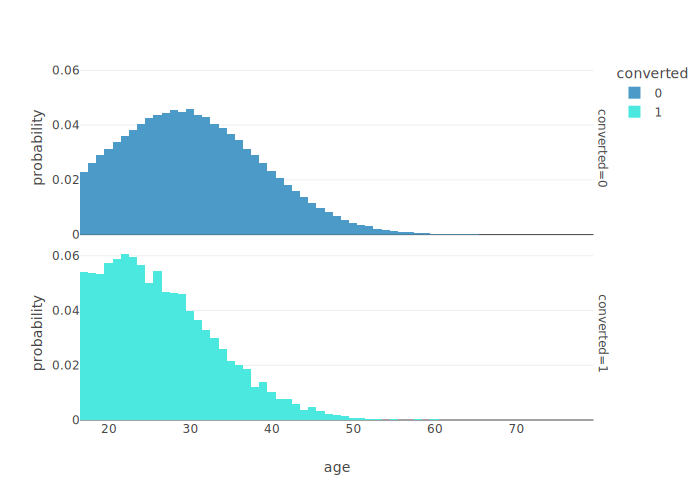

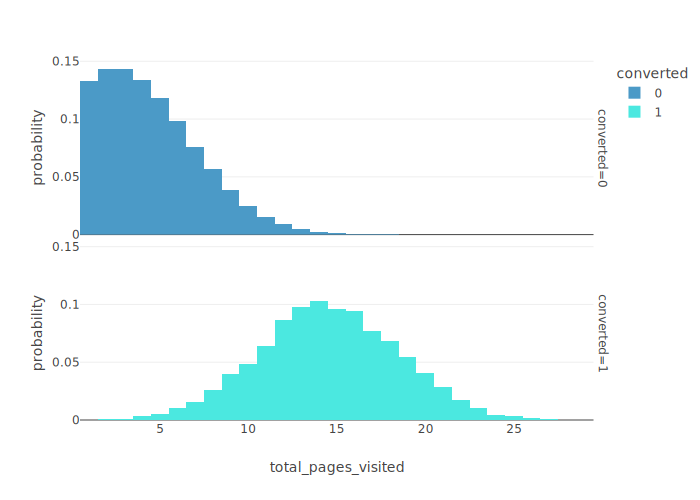

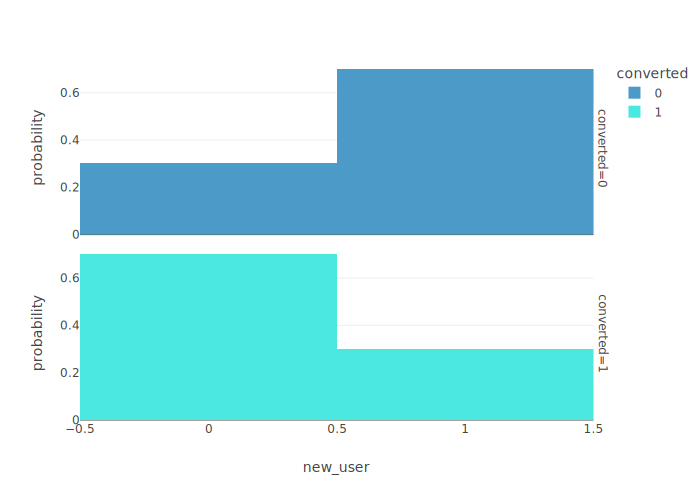

In [53]:

num_features = ["age", "total_pages_visited", "new_user"]
for f in num_features:
    fig = px.histogram(
        dataset, f, color="converted", facet_row="converted", histnorm="probability"
    )
    fig.show()

- Most of the users who suscribed to the newsletter are less than 30 year old.

- New users visiting the websited are those who will more probably suscribe to the newsletter.

In [54]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Train/Test Split

In [55]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "converted"

X = dataset.drop([target_variable], axis = 1)
Y = dataset.loc[:, target_variable]

print("...Done.")
print()

print("Y : ")
print(Y.head())
print()
print("X :")
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


In [56]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



# Preprocessing

In [57]:
numeric_features = ["age", "new_user", "total_pages_visited"]  # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
)

#categorial features
categorical_features = ["country", "source"]  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
        (   "encoder",
            OneHotEncoder(drop="first"),
        )  # first column will be dropped to avoid creating correlations between features
    ]
)

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [59]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(
    X_train[0:5]
)  # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  
print(
    X_test[0:5, :]
)
print()

Performing preprocessings on train set...
        country  age  new_user  source  total_pages_visited
70238        US   23         0  Direct                    5
11738        US   26         1     Ads                    4
51223   Germany   39         1     Ads                    2
251695       US   39         1     Seo                    8
30005        US   44         1     Seo                    2
...Done.
[[-0.91614386 -1.47777425  0.0376251   0.          0.          1.
   1.          0.        ]
 [-0.55333446  0.67669334 -0.2616379   0.          0.          1.
   0.          0.        ]
 [ 1.01883962  0.67669334 -0.86016391  1.          0.          0.
   0.          0.        ]
 [ 1.01883962  0.67669334  0.9354141   0.          0.          1.
   0.          1.        ]
 [ 1.62352196  0.67669334 -0.86016391  0.          0.          1.
   0.          1.        ]]

Performing preprocessings on test set...
       country  age  new_user  source  total_pages_visited
138303      UK   34   

# Baseline model training 
### Logistic regression

In [60]:
# Train model
print("Train model...")
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [61]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = logistic_classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = logistic_classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.94625285e-01 5.37471467e-03]
 [9.99544301e-01 4.55699308e-04]
 [9.99937580e-01 6.24203582e-05]
 ...
 [9.99822059e-01 1.77941071e-04]
 [8.71474712e-01 1.28525288e-01]
 [9.95684985e-01 4.31501514e-03]]



In [62]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = logistic_classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = logistic_classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[9.99963596e-01 3.64041856e-05]
 [9.95149587e-01 4.85041266e-03]
 [9.99987687e-01 1.23130344e-05]
 ...
 [9.99759965e-01 2.40034694e-04]
 [9.97404006e-01 2.59599359e-03]
 [9.99586621e-01 4.13378866e-04]]



In [63]:
logistic_classifier.coef_

column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['age', 'new_user', 'total_pages_visited', 'country_Germany', 'country_UK', 'country_US', 'source_Direct', 'source_Seo']


In [64]:
coefs = pd.DataFrame(index = column_names, data = abs(logistic_classifier.coef_.transpose()), columns=["coefficients"])
coefs

,coefficients
age,0.611771
new_user,0.793305
total_pages_visited,2.539439
country_Germany,3.603804
country_UK,3.454604
country_US,3.110408
source_Direct,0.218505
source_Seo,0.048095


### We evaluate the model's performace through accuracy score and f1 score 

In [65]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

new_rows = [
    {'model': 'logistic_regression', 'accuracy': accuracy_score(Y_train, Y_train_pred), 'set': 'train'},
    {'model': 'logistic_regression', 'accuracy': accuracy_score(Y_test, Y_test_pred), 'set': 'test'},
    {'model': 'logistic_regression', 'f1_score': f1_score(Y_train, Y_train_pred), 'set': 'train'},
    {'model': 'logistic_regression', 'f1_score': f1_score(Y_test, Y_test_pred), 'set': 'test'}
]

scores_df = pd.DataFrame(columns = ['model', 'accuracy', 'f1_score', 'set'])
scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)


accuracy on training set :  0.9862427633948573
accuracy on test set :  0.9862077447466442

f1-score on training set :  0.7636583157259282
f1-score on test set :  0.7646176911544227


/var/folders/sp/y1prs_xd6c5dq9mttys340t40000gn/T/ipykernel_5402/4278839276.py:17: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



### Classification report

In [66]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    220320
           1       0.86      0.69      0.76      7342

    accuracy                           0.99    227662
   macro avg       0.92      0.84      0.88    227662
weighted avg       0.99      0.99      0.99    227662



In [67]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.85      0.69      0.76      1836

    accuracy                           0.99     56916
   macro avg       0.92      0.85      0.88     56916
weighted avg       0.99      0.99      0.99     56916



In [68]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[219470    850]
 [  2282   5060]]

Confusion matrix on test set : 
[[54856   224]
 [  561  1275]]



### The classification report shows that:

0
precision: the model rarely misclassifies class 0 as class 1.
recall: model correctly captures all instances of class 0.
F1-score is a balance of precision and recall, optimum f1-score of 0.99

1
when the model predicts 1, it's correct 86% of times
recall: the model captures 69% of the 1 category. This means that the model is missing 31% that are the false negatives, which are 1 but are classified as 0.
F1-score is 76% but it's much lower than for the 0 class. 

The model can almost perfectly predict the 0 class, but it is less performant for predicting the 1 class.


### This may be due to the fact that the dataset is originally highly imbalanced: 96,77% of the values in the target variable are 0

### We try using the Class_weight parameter in the logistic regression. 

### This parameter adresses the problem of unbalanced datasets

In [69]:


# Create a logistic regression model with balanced class weights
classifier_2 = LogisticRegression(class_weight='balanced', random_state=0)

# Fit the model to the training data
classifier_2.fit(X_train, Y_train)


# Predict the target for the train and test data
y_pred_train = classifier_2.predict(X_train)
y_pred_test = classifier_2.predict(X_test)


### There results have not improved with Class_weight :

In [70]:
print(classification_report(Y_train, y_pred_train))

print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    220320
           1       0.35      0.94      0.51      7342

    accuracy                           0.94    227662
   macro avg       0.67      0.94      0.74    227662
weighted avg       0.98      0.94      0.95    227662

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     55080
           1       0.35      0.94      0.51      1836

    accuracy                           0.94     56916
   macro avg       0.67      0.94      0.74     56916
weighted avg       0.98      0.94      0.95     56916



### We apply Smote to oversample the minority class in the training set

#### The model still is less performant to predict correctly the class 1 (f1 score on the class 1 is 0.51 in the train and the test )

In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=0)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Train the logistic regression model on the resampled data
logreg_smote = LogisticRegression(random_state=0)
logreg_smote.fit(X_train_resampled, Y_train_resampled)

# Predict and evaluate
y_pred_train_smote = logreg_smote.predict(X_train)
y_pred_test_smote = logreg_smote.predict(X_test)

print(classification_report(Y_train, y_pred_train_smote))
print(classification_report(Y_test, y_pred_test_smote))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97    220320
           1       0.35      0.94      0.51      7342

    accuracy                           0.94    227662
   macro avg       0.67      0.94      0.74    227662
weighted avg       0.98      0.94      0.95    227662

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     55080
           1       0.35      0.94      0.51      1836

    accuracy                           0.94     56916
   macro avg       0.67      0.94      0.74     56916
weighted avg       0.98      0.94      0.95     56916



### We try to improve the model's performance with undersampling to reduce the majority class, which is 0.

#### But the results do not improve.

In [72]:
from imblearn.under_sampling import RandomUnderSampler


undersample = RandomUnderSampler(random_state=0)
X_train_resampled, Y_train_resampled = undersample.fit_resample(X_train, Y_train)

# Train a logistic regression model on the undersampled data
logreg_undersampled = LogisticRegression(random_state=0)
logreg_undersampled.fit(X_train_resampled, Y_train_resampled)

# Predict and evaluate
y_pred_train_undersampled = logreg_undersampled.predict(X_train)
y_pred_test_undersampled = logreg_undersampled.predict(X_test)

print(classification_report(Y_train, y_pred_train_undersampled))
print(classification_report(Y_test, y_pred_test_undersampled))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97    220320
           1       0.35      0.94      0.51      7342

    accuracy                           0.94    227662
   macro avg       0.67      0.94      0.74    227662
weighted avg       0.98      0.94      0.95    227662

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     55080
           1       0.35      0.94      0.51      1836

    accuracy                           0.94     56916
   macro avg       0.67      0.94      0.74     56916
weighted avg       0.98      0.94      0.95     56916



### We try with decision trees and random forest models but the prediction of the minority class does not improve.

In [73]:
# Perform grid search
print("Grid search...")
decision_tree = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    "max_depth": [4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 4, 8, 10],
}
gridsearch_decision_tree = GridSearchCV(
    decision_tree, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch_decision_tree.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_decision_tree.best_params_)
print("Best validation accuracy : ", gridsearch_decision_tree.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best validation accuracy :  0.985438938793541


In [74]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch_decision_tree.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

print("Probabilities on training set...")
Y_train_proba = gridsearch_decision_tree.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch_decision_tree.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

print("Probabilities on test set...")
Y_test_proba = gridsearch_decision_tree.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.97255147e-01 2.74485340e-03]
 [9.99918139e-01 8.18609728e-05]
 [9.99918139e-01 8.18609728e-05]
 ...
 [9.99774190e-01 2.25810094e-04]
 [9.55710956e-01 4.42890443e-02]
 [9.96254682e-01 3.74531835e-03]]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[9.99918139e-01 8.18609728e-05]
 [9.97255147e-01 2.74485340e-03]
 [9.99918139e-01 8.18609728e-05]
 ...
 [9.99774190e-01 2.25810094e-04]
 [9.99162167e-01 8.37832806e-04]
 [9.88221437e-01 1.17785630e-02]]



In [75]:
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

accuracy on training set :  0.9862076235823282
accuracy on test set :  0.9850481411202474

f1-score on training set :  0.7584243729804585
f1-score on test set :  0.7398349128706818
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    220320
           1       0.87      0.67      0.76      7342

    accuracy                           0.99    227662
   macro avg       0.93      0.83      0.88    227662
weighted avg       0.99      0.99      0.99    227662

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.84      0.66      0.74      1836

    accuracy                           0.99     56916
   macro avg       0.92      0.83      0.87     56916
weighted avg       0.98      0.99      0.98     56916



In [76]:
new_rows = [
    {'model': 'decision_tree', 'accuracy': accuracy_score(Y_train, Y_train_pred), 'set': 'train'},
    {'model': 'decision_tree', 'accuracy': accuracy_score(Y_test, Y_test_pred), 'set': 'test'},
    {'model': 'decision_tree', 'f1_score': f1_score(Y_train, Y_train_pred), 'set': 'train'},
    {'model': 'decision_tree', 'f1_score': f1_score(Y_test, Y_test_pred), 'set': 'test'}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)

Confusion Matrix decision tree


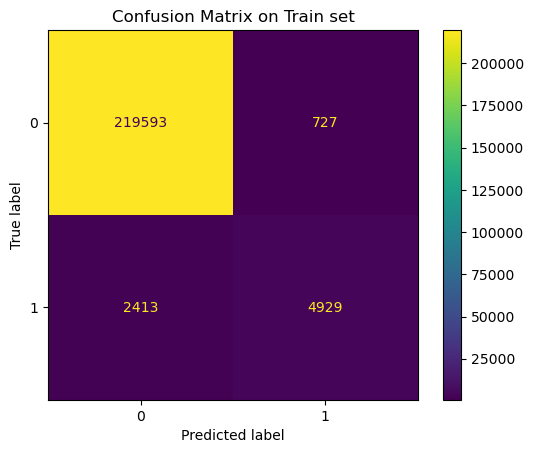

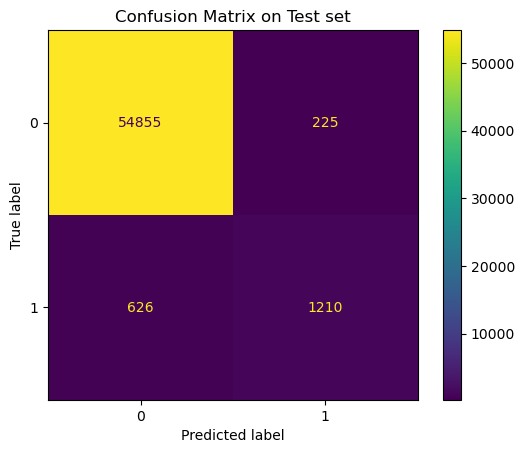

In [77]:
print('Confusion Matrix decision tree')
# Visualize confusion matrices
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    gridsearch_decision_tree, X_train, Y_train, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    gridsearch_decision_tree, X_test, Y_test, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

Random Forest

In [78]:
# Perform grid search
print("Grid search...")
random_forest_classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 4, 8],
    "n_estimators": [10, 20, 40],
}
gridsearch_random_forest = GridSearchCV(
    random_forest_classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch_random_forest.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_random_forest.best_params_)
print("Best validation accuracy : ", gridsearch_random_forest.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 40}
Best validation accuracy :  0.98604510183308


In [79]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch_random_forest.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

print("Probabilities on training set...")
Y_train_proba = gridsearch_random_forest.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch_random_forest.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

print("Probabilities on test set...")
Y_test_proba = gridsearch_random_forest.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.94185520e-01 5.81448034e-03]
 [9.98063942e-01 1.93605781e-03]
 [9.99174166e-01 8.25834348e-04]
 ...
 [9.94425695e-01 5.57430522e-03]
 [9.56873219e-01 4.31267814e-02]
 [9.97127625e-01 2.87237457e-03]]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[9.98227295e-01 1.77270505e-03]
 [9.94519095e-01 5.48090456e-03]
 [9.99067150e-01 9.32849980e-04]
 ...
 [9.96201496e-01 3.79850447e-03]
 [9.97133942e-01 2.86605849e-03]
 [9.99144489e-01 8.55510787e-04]]



In [80]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

accuracy on training set :  0.9870290167001959
accuracy on test set :  0.9856103731815307

f1-score on training set :  0.7770142716907046
f1-score on test set :  0.754127889522666
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    220320
           1       0.87      0.70      0.78      7342

    accuracy                           0.99    227662
   macro avg       0.93      0.85      0.89    227662
weighted avg       0.99      0.99      0.99    227662

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.84      0.68      0.75      1836

    accuracy                           0.99     56916
   macro avg       0.91      0.84      0.87     56916
weighted avg       0.98      0.99      0.98     56916



### Acuracy scores from the different models's df

In [81]:
new_rows = [
    {'model': 'random_forest', 'accuracy': accuracy_score(Y_train, Y_train_pred), 'set': 'train'},
    {'model': 'random_forest', 'accuracy': accuracy_score(Y_test, Y_test_pred), 'set': 'test'},
    {'model': 'random_forest', 'f1_score': f1_score(Y_train, Y_train_pred), 'set': 'train'},
    {'model': 'random_forest', 'f1_score': f1_score(Y_test, Y_test_pred), 'set': 'test'}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)


### Since Decision trees and random forest do not improve the predictions of the minority class (class 1) we try with ensemble learning, Adaboost.

In [82]:
# Perform grid search
print("Grid search...")
logistic_regression = LogisticRegression(max_iter = 1000)
adaboost_logreg = AdaBoostClassifier(logistic_regression)

# Grid of values to be tested
params = {
    'estimator__C': [0.01, 0.05, 0.1, 0.5, 1.0, 2, 4, 5.0, 10.0],
    'n_estimators': [5, 10, 20, 40, 60, 80]
}
print(params)
gridsearch_adaboost = GridSearchCV(adaboost_logreg, param_grid = params, cv = 3, verbose = 1) # cv : the number of folds to be used for CV
gridsearch_adaboost.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_adaboost.best_params_)
print("Best validation accuracy : ", gridsearch_adaboost.best_score_)
print()
print("Accuracy on training set : ", gridsearch_adaboost.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch_adaboost.score(X_test, Y_test))


Grid search...
{'estimator__C': [0.01, 0.05, 0.1, 0.5, 1.0, 2, 4, 5.0, 10.0], 'n_estimators': [5, 10, 20, 40, 60, 80]}
Fitting 3 folds for each of 54 candidates, totalling 162 fits
...Done.
Best hyperparameters :  {'estimator__C': 4, 'n_estimators': 80}
Best validation accuracy :  0.9862164085928099

Accuracy on training set :  0.9862295859651589
Accuracy on test set :  0.9860320472274932


In [83]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch_adaboost.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

print("Probabilities on training set...")
Y_train_proba = gridsearch_adaboost.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch_adaboost.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

print("Probabilities on test set...")
Y_test_proba = gridsearch_adaboost.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.51624766 0.48375234]
 [0.52375935 0.47624065]
 [0.53074034 0.46925966]
 ...
 [0.52704131 0.47295869]
 [0.50632755 0.49367245]
 [0.51692879 0.48307121]]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.53203808 0.46796192]
 [0.51702898 0.48297102]
 [0.53502001 0.46497999]
 ...
 [0.52601981 0.47398019]
 [0.51894048 0.48105952]
 [0.52290631 0.47709369]]



In [84]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

accuracy on training set :  0.9862295859651589
accuracy on test set :  0.9860320472274932

f1-score on training set :  0.7627336713842428
f1-score on test set :  0.7617620617320947
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    220320
           1       0.86      0.69      0.76      7342

    accuracy                           0.99    227662
   macro avg       0.92      0.84      0.88    227662
weighted avg       0.99      0.99      0.99    227662

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.85      0.69      0.76      1836

    accuracy                           0.99     56916
   macro avg       0.92      0.84      0.88     56916
weighted avg       0.99      0.99      0.99     56916



In [85]:
new_rows = [
    {'model': 'adaboost_logreg', 'accuracy': gridsearch_adaboost.score(X_train, Y_train), 'set': 'train'},
    {'model': 'adaboost_logreg', 'accuracy': gridsearch_adaboost.score(X_test, Y_test), 'set': 'test'},
    {'model': 'adaboost_logreg', 'f1_score': f1_score(Y_train, Y_train_pred), 'set': 'train'},
    {'model': 'adaboost_logreg', 'f1_score': f1_score(Y_test, Y_test_pred), 'set': 'test'}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)



### The best model was the baseline model. 

### We couldn't improve the predictions on the minority class of this unbalanced dataset with the rest of the models
### The minority class has a f1 score of 0.76 which means that the model is less perfomant to correctly predict all true class 1 compared to class 0.

### A larger and less unbalanced dataset could help improving the model's predictins.

# Predictions on X_without_labels

In [86]:
#Importing test set

print("Loading dataset...")
dataset_test = pd.read_csv("/Users/agustindei/Documents/Jedha/Full_Stack/Projets/conversion_data_test.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [87]:
dataset_test

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3
...,...,...,...,...,...
31615,Germany,25,1,Seo,3
31616,US,36,1,Ads,7
31617,UK,33,1,Seo,5
31618,UK,25,1,Seo,14


#### Pre-processing

In [89]:

dataset_test_transformed = preprocessor.transform(dataset_test)  


#### Predictions on the dataset test

In [92]:
dataset_test_predictions = logistic_classifier.predict(dataset_test_transformed)

In [99]:
dataset_test['prediction_logistic_regression'] = dataset_test_predictions

In [100]:
dataset_test.head(2)

,country,age,new_user,source,total_pages_visited,prediction_logistic_regression
0,UK,28,0,Seo,16,1
1,UK,22,1,Direct,5,0


we create a csv file with the dataset test and the corresponding predictions

In [101]:
dataset_test.to_csv('dataset_test_with_predictions.csv')
